# 棒球赛数据分析
> 数据来源：http://www.seanlahman.com/baseball-archive/statistics/ (2016 Version)

### 感兴趣问题：
* 与左右手相关的问题
    1. 历年来所有球员中有多少人使用左手？多少人使用右手？这些球员有多少进入全明星赛,左手球员比例大,还是右手球员比例大?


* 获奖球员相关问题
    1. 历年来所有获奖球员的分布情况：年龄，城市等
    
    
* 球员薪酬问题
    1. 历年来球员薪酬变化情况
    2. 历年薪酬最高的球员的情况

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
csv_path = './baseballdatabank-2017.1/core/'

### 探索球员中左右手比例问题

In [2]:
# 用到的表: Master, AllStarFull
master = pd.read_csv(csv_path + 'Master.csv')
allstar = pd.read_csv(csv_path + 'AllstarFull.csv')

In [3]:
# 提取master表中使用左手,右手和双手的球员,过滤掉没有此信息的球员
left_player = master[master['bats']=='L']
right_player = master[master['bats']=='R']
both_player = master[master['bats']=='B']

In [4]:
# 统计allstarfull表中使用左手,右手和双手的球员
left_allstar = allstar.merge(left_player,on='playerID',how='inner')
right_allstar = allstar.merge(right_player,on='playerID',how='inner')
both_allstar = allstar.merge(both_player,on='playerID',how='inner')

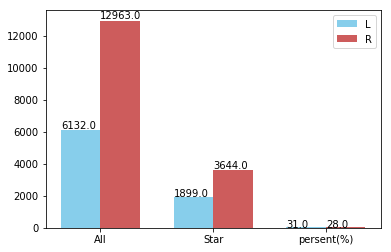

In [5]:
# 用双手的球员同时归类到左手球员和右手球员中,绘制左手,右手的条形图
lp_count = len(left_player) + len(both_player)
rp_count = len(right_player) + len(both_player)
ls_count = len(left_allstar) + len(both_allstar)
rs_count = len(right_allstar) + len(both_allstar)
left_data=[lp_count, ls_count, (ls_count*1.0/lp_count)*100]
right_data=[rp_count, rs_count, (rs_count*1.0/rp_count)*100]

ind = np.arange(len(left_data))  # the x locations for the groups
width = 0.35  # the width of the bars

figure = plt.figure()
ax=plt.subplot()

rects1 = ax.bar(ind - width/2, left_data, width, color='SkyBlue', label='L')
rects2 = ax.bar(ind + width/2, right_data, width, color='IndianRed', label='R')

ax.set_xticks(ind)
ax.set_xticklabels(('All', 'Star', 'persent(%)', 'G4'))
ax.legend()

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x(), 1.01*height, '{}'.format(round(height)))

autolabel(rects1)
autolabel(rects2)

结论：从现有数据来看，虽然整体上使用右手的球员更多，但是使用左手和使用右手的球员进入全明星赛的比例是差不多的: 31% 和 28%。

作图参考：
   * https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py
   * https://matplotlib.org/api/text_api.html

### 探索获奖球员相关问题

In [6]:
# 用到的表：AwardsPlayers, Master
master = pd.read_csv(csv_path + 'Master.csv')
awards = pd.read_csv(csv_path + 'AwardsPlayers.csv')

#### 1. 分析获奖球员的年龄分布情况

In [7]:
awards_player_full = awards.merge(master,on='playerID',how='left')
awards_player_full['Age'] = awards_player_full['yearID']-awards_player_full['birthYear']
awards_player_full.head()

,playerID,awardID,yearID,lgID,tie,notes,birthYear,birthMonth,birthDay,birthCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,Age
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN,1856.0,4.0,2.0,Ireland,...,Thomas Henry,160.0,67.0,R,R,1874-05-05,1884-08-11,bondt101,bondto01,21.0
1,hinespa01,Triple Crown,1878,NL,NaN,NaN,1855.0,3.0,1.0,USA,...,Paul Aloysius,173.0,69.0,R,R,1872-04-20,1891-07-03,hinep101,hinespa01,23.0
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN,1856.0,4.0,3.0,USA,...,Guy Jackson,190.0,72.0,R,R,1882-05-02,1890-09-30,heckg101,heckegu01,28.0
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN,1854.0,12.0,11.0,USA,...,Charles Gardner,168.0,69.0,R,R,1880-05-05,1891-08-11,radbc101,radboch01,30.0
4,oneilti01,Triple Crown,1887,AA,NaN,NaN,1858.0,5.0,25.0,CAN,...,James Edward,167.0,73.0,R,R,1883-05-05,1892-08-30,oneit101,o'neiti01,29.0


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.82000000e+02,   4.27500000e+03,   1.68300000e+03,
          1.40000000e+01,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([-15. ,  -5.6,   3.8,  13.2,  22.6,  32. ,  41.4,  50.8,  60.2,
         69.6,  79. ]),
 <a list of 10 Patch objects>)

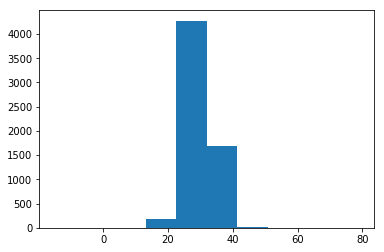

In [8]:
plt.hist(awards_player_full['Age'])

In [9]:
awards_player_full['Age'].describe()

count    6158.000000
mean       29.234816
std         4.176013
min       -15.000000
25%        26.000000
50%        29.000000
75%        32.000000
max        79.000000
Name: Age, dtype: float64

数据分析：发现min和max不太对，应该有异常数据，需要进行清洗。

In [10]:
# 分析Age过小数据
awards_player_full[awards_player_full['Age'] < 20.0]

,playerID,awardID,yearID,lgID,tie,notes,birthYear,birthMonth,birthDay,birthCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,Age
2053,ayalabo01,TSN Player of the Year,1954,AL,NaN,NaN,1969.0,7.0,8.0,USA,...,Robert Joseph,190.0,74.0,R,R,1992-09-05,1999-10-02,ayalb002,ayalabo01,-15.0


上面这条数据，player获奖年份yearID比出生日期birthYear还早,应该是数据统计有误，在统计时需要删除。

In [11]:
# 分析Age过大数据
awards_player_full[awards_player_full['Age'] > 45.0]

,playerID,awardID,yearID,lgID,tie,notes,birthYear,birthMonth,birthDay,birthCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,Age
5123,valenbo02,Branch Rickey Award,2002,ML,NaN,NaN,1950.0,5.0,13.0,USA,...,Robert John,189.0,70.0,R,R,1969-09-02,1979-09-30,valeb102,valenbo02,52.0
5205,hemonro99,Branch Rickey Award,2003,ML,NaN,NaN,1929.0,10.0,26.0,USA,...,Roland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hemonro99,74.0
5447,lasorto01,Branch Rickey Award,2006,ML,NaN,NaN,1927.0,9.0,22.0,USA,...,Thomas Charles,175.0,70.0,L,L,1954-08-05,1956-07-08,lasot101,lasorto01,79.0


以上3条数据，球员获奖时年龄分别为52，74，79，感觉年龄有点偏大了，不太常见，决定过滤掉他们。

In [12]:
# 过滤后数据重新绘图
awards_player_new = awards_player_full[(awards_player_full['Age'] < 45.0) & (awards_player_full['Age'] > 15.0)]
awards_player_new['Age'].describe()

count    6154.000000
mean       29.222944
std         4.039785
min        20.000000
25%        26.000000
50%        29.000000
75%        32.000000
max        44.000000
Name: Age, dtype: float64

(array([  182.,   540.,  1504.,  1199.,  1032.,  1055.,   356.,   216.,
           56.,    14.]),
 array([ 20. ,  22.4,  24.8,  27.2,  29.6,  32. ,  34.4,  36.8,  39.2,
         41.6,  44. ]),
 <a list of 10 Patch objects>)

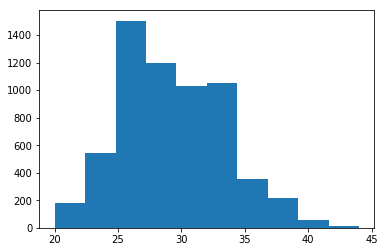

In [13]:
plt.hist(awards_player_new['Age'])

结论：从现有数据可以看出，获奖的棒球球员年龄主要集中在25-32岁之间，以25-27最多。分析原因可能是因为25岁以前经验不足，32岁以后体力跟不上，所以棒球员的活跃年龄在25-32岁之间。

参考：
   * [pandas进行数据分析需要的一些操作](https://www.cnblogs.com/caicaihong/p/5890239.html)
   * [pandas添加列](https://www.cnblogs.com/rrttp/p/8108188.html)
   * [pandas多条件筛选](https://blog.csdn.net/jt1123/article/details/50086595)

#### 2. 分析获奖球员的城市分布情况

In [14]:
awards_player = pd.Series(list(set(awards['playerID']))) # 获取获奖球员名单（去重）
awards_player_info = master[master['playerID'].isin(awards_player)]
awards_player_info.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
14,abbotji01,1967.0,9.0,19.0,USA,MI,Flint,NaN,NaN,NaN,...,Abbott,James Anthony,200.0,75.0,L,L,1989-04-08,1999-07-21,abboj001,abbotji01
25,abernte02,1933.0,3.0,6.0,USA,NC,Stanley,2004.0,12.0,16.0,...,Abernathy,Theodore Wade,215.0,76.0,R,R,1955-04-13,1972-09-30,abert101,abernte02
33,abreubo01,1974.0,3.0,11.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,Abreu,Bob Kelly,220.0,72.0,L,R,1996-09-01,2014-09-28,abreb001,abreubo01
35,abreujo02,1987.0,1.0,29.0,Cuba,Cienfuegos,Cienfuegos,NaN,NaN,NaN,...,Abreu,Jose Dariel,255.0,75.0,R,R,2014-03-31,2016-10-02,abrej003,abreujo02


In [15]:
awards_player_info.groupby('birthCountry').size() # 查看获奖球员国家分别

birthCountry
Aruba           1
Brazil          1
CAN            15
Colombia        2
Cuba           23
Curacao         3
D.R.           53
Germany         1
Ireland         2
Jamaica         1
Japan           5
Mexico          7
P.R.           35
Panama          6
Russia          1
USA          1153
V.I.            1
Venezuela      32
Viet Nam        1
dtype: int64

从上面数据可以看出,球员主要是美国的,所以这里我们只分析美国出生的球员对应的城市:

In [16]:
awards_player_usa = awards_player_info[awards_player_info['birthCountry']=='USA']
len(awards_player_usa)

1153

In [17]:
all_player_usa = master[master['birthCountry']=='USA']
len(all_player_usa)

16694

In [18]:
awards_usa_city = awards_player_usa.groupby('birthCity').size()
all_usa_city = all_player_usa.groupby('birthCity').size()

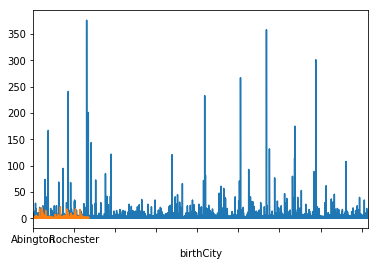

In [19]:
all_usa_city.plot()
awards_usa_city.plot()

由上图可知，只有部分城市有获奖球员，下面将分析这些城市

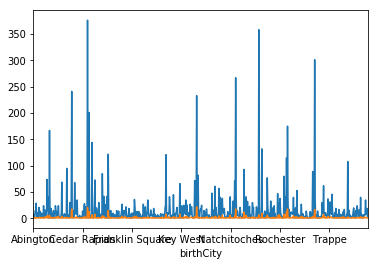

In [20]:
all_usa_city[all_usa_city.index.isin(awards_usa_city.index)].plot()
awards_usa_city.plot()

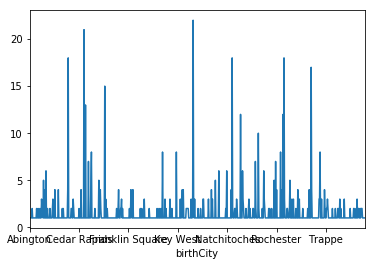

In [21]:
# 查看这些有获奖球员的城市的获奖球员数量
awards_usa_city.plot()

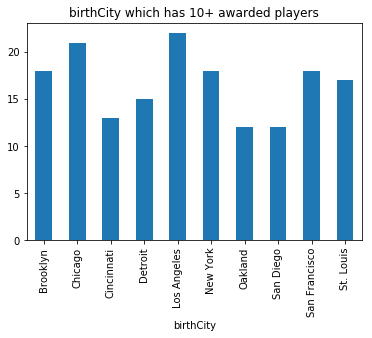

In [22]:
# 由上图可知，只有部分城市获奖球员在10人以上，分析这些城市

high_awards_city = awards_usa_city[awards_usa_city.values > 10]
high_awards_city.plot(kind='bar',title='birthCity which has 10+ awarded players')

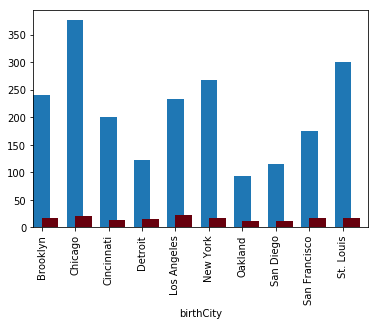

In [23]:
# 查看上面这些城市对应的球员总数量
all_usa_city[all_usa_city.index.isin(high_awards_city.index)].plot(kind='bar')
high_awards_city.plot(kind='bar',position=0,colormap='Reds_r')

结论：从上图来看，虽然这些城市获奖的球员数量不少，但是总球员数量也很多，总体来看，获奖的概率不是特别高。

分析球员获奖概率最高的城市

In [24]:
# 获取有获奖球员的城市所有球员的获奖概率
rate_awards_city = (awards_usa_city / all_usa_city).dropna()
rate_awards_city.head()

birthCity
Abington    0.125000
Adrian      0.142857
Agnew       1.000000
Ahoskie     1.000000
Akron       0.071429
dtype: float64

In [25]:
# 查看有多少城市球员获奖概率为100%
rate1_city = rate_awards_city[rate_awards_city.values == 1]
len(rate1_city)

155

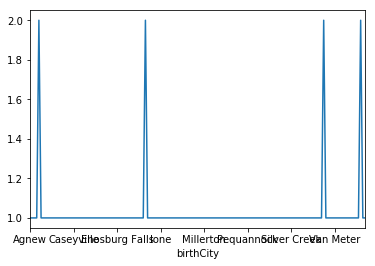

In [26]:
# 查看这些100%获奖的城市各有多少球员
all_usa_city[all_usa_city.index.isin(rate1_city.index)].plot()

从上图可知，这些100%获奖的城市基本只有1个球员，少数几个城市有2个球员，看来从这些城市中冲出来的球员都是特别棒的球员。

参考：
   * [pandas.DataFrame.plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

### 探索球员薪酬问题

In [27]:
# 用到的表: Master, AllStarFull
master = pd.read_csv(csv_path + 'Master.csv')
salary = pd.read_csv(csv_path + 'Salaries.csv')

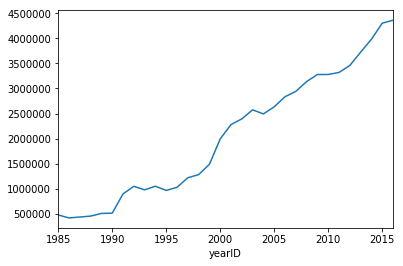

In [28]:
player_salary = master.merge(salary,on='playerID',how='inner')
player_salary.groupby('yearID').mean()['salary'].plot()

结论：从现有数据来看，帮球员的薪酬水平是逐年呈显著性水平提升的，预计今后的增长幅度也差不多。

In [29]:
# 每年最高薪酬球员
highest_salary = player_salary.groupby('yearID').max()
highest_salary.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,height,bats,throws,debut,finalGame,retroID,bbrefID,teamID,lgID,salary
yearID,,,,,,,,,,,,,,,,,,,,,
1985,ziskri01,1964.0,12.0,31.0,Venezuela,WY,Zeist,2016.0,12.0,30.0,...,80.0,R,R,1986-06-11,2007-09-17,ziskr101,ziskri01,TOR,NL,2130300
1986,ziskri01,1966.0,12.0,31.0,Venezuela,WY,Zeist,2016.0,12.0,30.0,...,80.0,R,R,1986-09-02,2012-05-27,ziskr101,ziskri01,TOR,NL,2800000
1987,ziskri01,1966.0,12.0,31.0,Venezuela,WY,Zeist,2016.0,12.0,30.0,...,79.0,R,R,1987-08-30,2012-05-27,ziskr101,ziskri01,TOR,NL,2127333
1988,yountro01,1967.0,12.0,31.0,Venezuela,WY,Zeist,2016.0,12.0,30.0,...,80.0,R,R,1992-06-14,2012-05-27,younr001,yountro01,TOR,NL,2340000
1989,zuvelpa01,1969.0,12.0,31.0,Venezuela,Zulia,Zeist,2016.0,12.0,30.0,...,82.0,R,R,1989-09-01,2012-10-03,zuvep001,zuvelpa01,TOR,NL,2766667


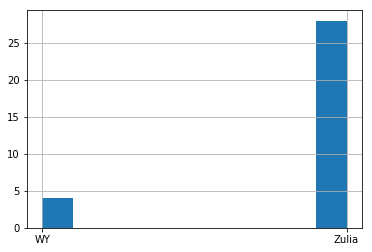

In [30]:
highest_salary['birthState'].hist()

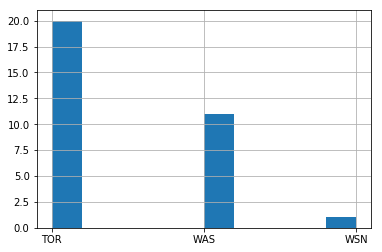

In [31]:
highest_salary['teamID'].hist()

结论：从目前数据来看, 历年来最高薪酬的球员基本都是Zulia出生的，大部分球员都是属于TOR(Toronto Blue Jays)球队。（想要拿高薪的注意啦，赶紧去Zulia和TOR报道吧，哈哈）